In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

del torch
del torchvision

0.4.1
0.2.1


In [2]:
import sys
sys.path.append("/home/jupyter/pytorch-codes/fastai-course-2018/")

In [4]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
path = "/home/jupyter/data/dogscats/small/"
image_size = 299
arch = resnext50
batch_size = 28

In [6]:
tfms = tfms_from_model(arch, image_size, aug_tfms=transforms_side_on, max_zoom=1.1)

In [7]:
data = ImageClassifierData.from_paths(path, tfms=tfms, bs=batch_size, num_workers=4)

In [8]:
!rm -rf {PATH}tmp

In [9]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 36/36 [00:22<00:00,  1.79it/s]


In [10]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.053615   0.030545   0.991     



[0.03054525013966486, 0.9910000042915345]

In [11]:
learn.precompute = False

In [12]:
learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.043575   0.035989   0.99      
    1      0.043436   0.03015    0.992     



[0.030149668079277034, 0.9920000038146972]

In [13]:
learn.unfreeze()

In [14]:
lr = np.array([1e-4, 1e-3, 1e-2])

In [15]:
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.140386   0.050114   0.986     
    1      0.080761   0.03732    0.988     
    2      0.060604   0.02988    0.991     



[0.029879922797204927, 0.9910000042915345]

In [16]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [17]:
accuracy_np(probs,y)

0.993

In [18]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[498   2]
 [  5 495]]


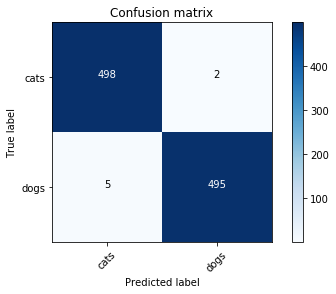

In [19]:
plot_confusion_matrix(cm, data.classes)